# FiveThirtyEight: Can You Randomly Move the Tower?
Justin Marschall  
2021-02-05  
https://fivethirtyeight.com/features/can-you-randomly-move-the-tower/

## Riddler Classic

From Toby Berger comes a towering challenge:

Cassius the ape (a friend of Caesar’s) has gotten his hands on a Lucas’ Tower puzzle (also commonly referred to as the “Tower of Hanoi”). This particular puzzle consists of three poles and three disks, all of which start on the same pole. The three disks have different diameters — the biggest disk is at the bottom and the smallest disk is at the top. The goal is to move all three disks from one pole to any other pole, one at a time, but there’s a catch. At no point can a larger disk ever sit atop a smaller disk.

For N disks, the minimum number of moves is 2<sup>N</sup>−1. (Spoiler alert! If you haven’t proven this before, give it a shot. It’s an excellent exercise in mathematical induction.)

But this week, the minimum number of moves is not in question. It turns out that Cassius couldn’t care less about solving the puzzle, but he is very good at following directions and understands a larger disk can never sit atop a smaller disk. With each move, he randomly chooses one among the set of valid moves.

On average, how many moves will it take for Cassius to solve this puzzle with three disks?

Extra credit: On average, how many moves will it take for Cassius to solve this puzzle in the general case of N disks?

## Set Up

In [1]:
import random
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def move_check(a, b):
    """
    function to check if a can move to b
    """
    
    if len(a) == 0:
        return False
    elif len(b) == 0:
        return True
    elif a[-1] > b[-1]:
        return False
    else:
        return True

In [3]:
def move_stack(a, b):
    """
    function to move a to b
    """
    
    b.append(a.pop())

In [4]:
def simulation():
    """
    function to run one simulation, moving stack from col_1 to either col_2 or col_3
    
    the top of the stack is considered col_n[-1]
    """
    
    # initial set up
    col_1 = [3, 2, 1]
    col_2 = []
    col_3 = []
    
    # list of possible moves
    options = [(col_1, col_2), (col_1, col_3), (col_2, col_1), (col_2, col_3), (col_3, col_1), (col_3, col_2)]
    
    # move counter
    n = 0
    
    # solve puzzle
    while (len(col_2) < 3) & (len(col_3) < 3):
        # get valid moves
        valid_moves = [move_check(x,y) for x,y in options]
        
        # select random choice from valid_moves
        random_choice = random.choice([i for i, x in enumerate(valid_moves) if x])
        
        # resolve choice
        if random_choice == 0:
            move_stack(col_1, col_2)
        elif random_choice == 1:
            move_stack(col_1, col_3)
        elif random_choice == 2:
            move_stack(col_2, col_1)
        elif random_choice == 3:
            move_stack(col_2, col_3)
        elif random_choice == 4:
            move_stack(col_3, col_1)
        elif random_choice == 5:
            move_stack(col_3, col_2)
        else:
            raise ValueError('random_choice is out of bounds')
        
        # update count
        n += 1
    
    return n

## Run Simulation 

In [5]:
random.seed(12345)
sim = [simulation() for i in range(1000000)]

In [6]:
pd.Series(sim).describe()

count    1000000.000000
mean          70.722741
std           53.642194
min            7.000000
25%           33.000000
50%           56.000000
75%           92.000000
max          813.000000
dtype: float64

<AxesSubplot:ylabel='Density'>

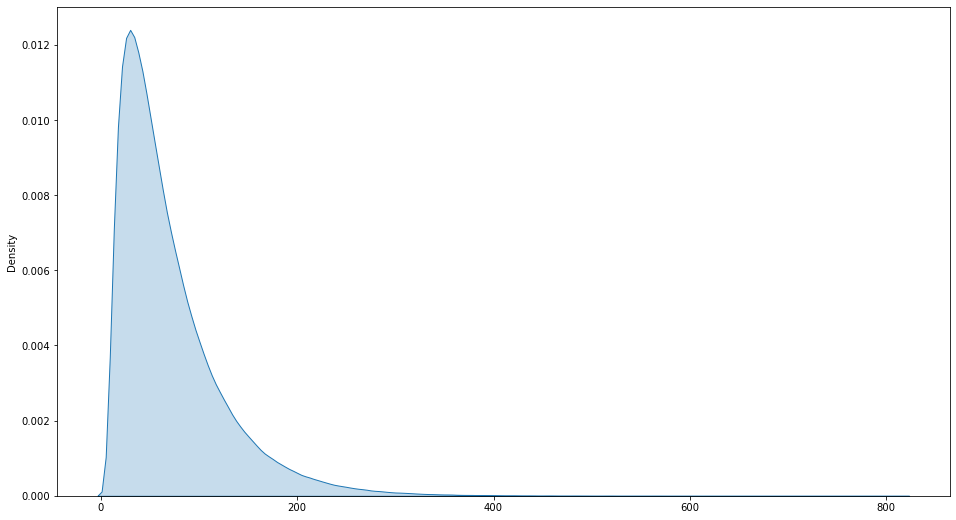

In [7]:
plt.figure(figsize = (16, 9))
sns.kdeplot(pd.Series(sim), fill = 'blue')